## Observations and Insights 

In [137]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
import csv

# Study data files
mouse_metadata_path = "./matplotlib/Resources/Mouse_metadata.csv"
study_results_path = "./matplotlib/Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata= pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [138]:
# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how= "outer")
# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [139]:
# Checking the number of mice.
mice= len(data_df["Mouse ID"].value_counts())

mice_df

,Mouse ID
0,249


In [140]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

duplicate_mouse_ids = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(duplicate_mouse_ids)



['g989']


In [141]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = duplicate_mice_df.loc[duplicate_mice_df.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()



In [142]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = data_df[data_df["Mouse ID"] != "g989"]


In [143]:
# Checking the number of mice in the clean DataFrame.
clean= len(clean_mice_df["Mouse ID"].unique())
clean_df= pd.DataFrame({"Mouse ID": [clean]})
clean_df




,Mouse ID
0,248


## Summary Statistics

In [144]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
summary_df= clean_mice_df.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_stdev = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
summary_grouped_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median,
                                   'Standard Deviation': tumor_stdev, 'SEM': tumor_sem})

summary_grouped_df.head()


,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


In [145]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

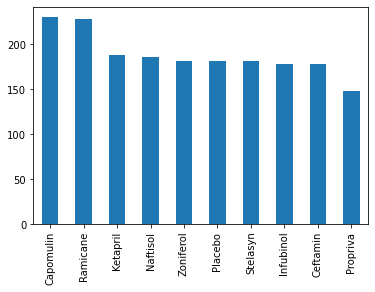

In [155]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_plot = clean_mice_df['Drug Regimen'].value_counts().plot.bar(width=0.5, zorder=3)


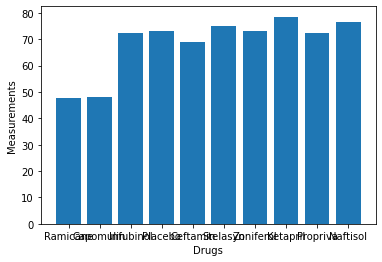

In [156]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_values = clean_mice_df['Drug Regimen']
y_values = clean_mice_df['Tumor Volume (mm3)']
plt.bar(x_values,y_values)
plt.xlabel('Drugs')
plt.ylabel('Measurements')
plt.show()


Text(0, 0.5, '')

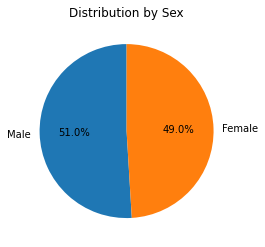

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
data = clean_mice_df['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')

# Hide the 'y' label
pie_plot.set_ylabel('')


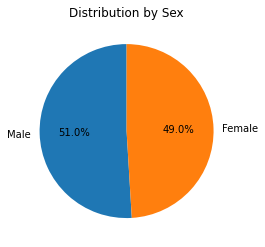

In [163]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Identify distribution of data by sex
data = clean_mice_df['Sex'].value_counts()

# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

# Display resulting plot
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
